# ::7:: - Gaussian Process - sinoid noisy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

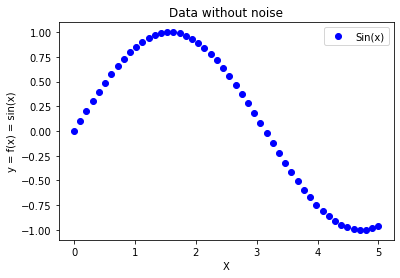

In [15]:
n = 50
X = np.linspace(0, 5, n)
Y = np.sin(X)
plt.title('Data without noise')
plt.plot(X, Y, 'bo', label='Sin(x)')
plt.xlabel('X')
plt.ylabel('y = f(x) = sin(x)')
plt.legend(loc='upper right')
plt.show()

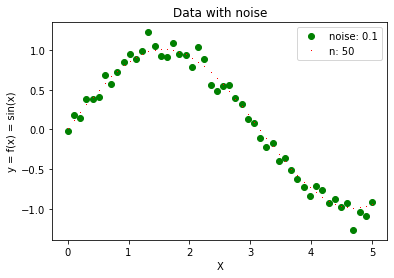

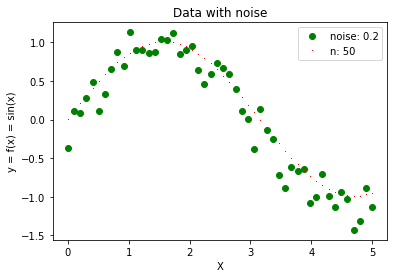

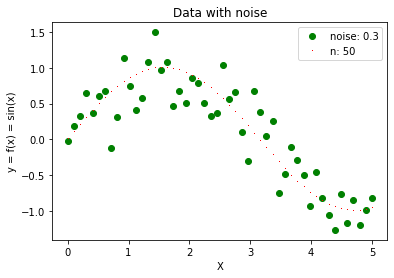

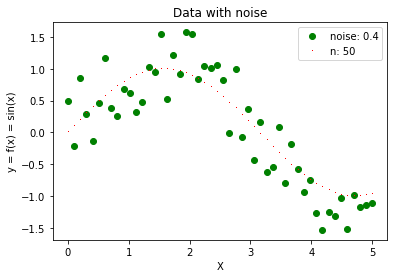

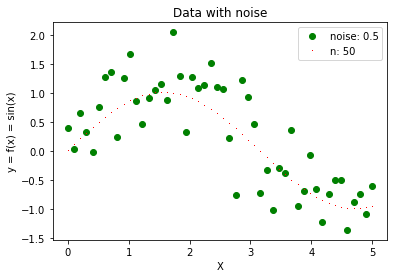

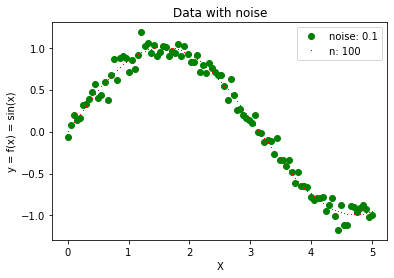

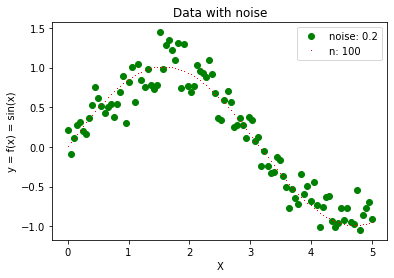

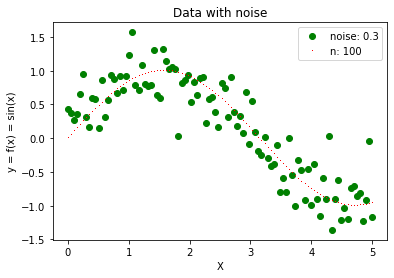

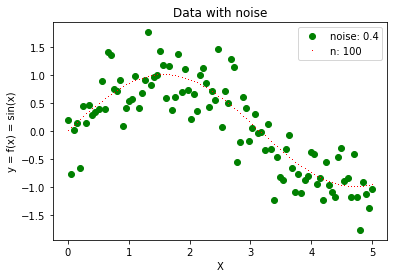

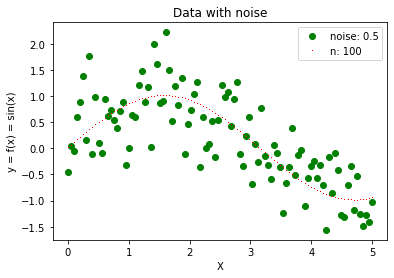

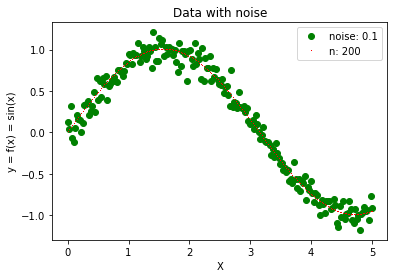

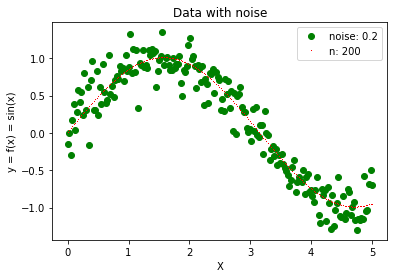

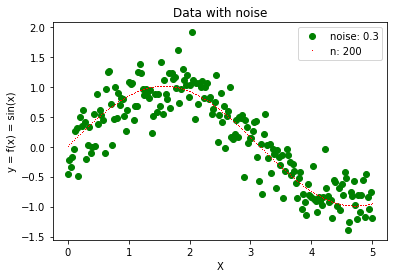

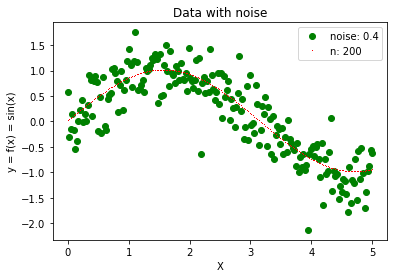

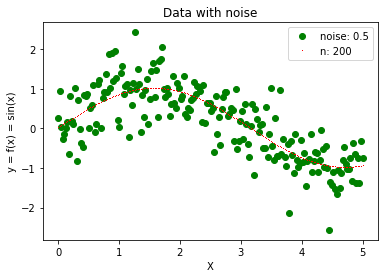

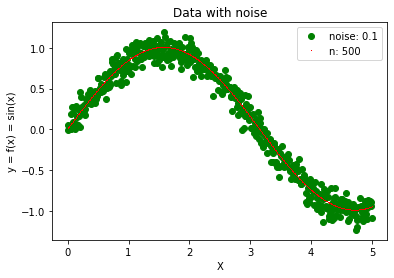

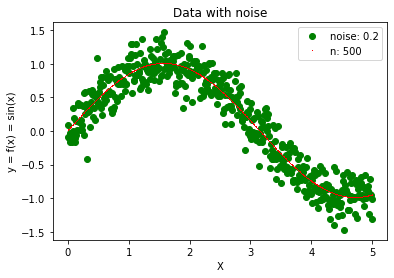

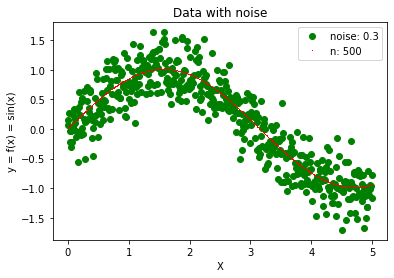

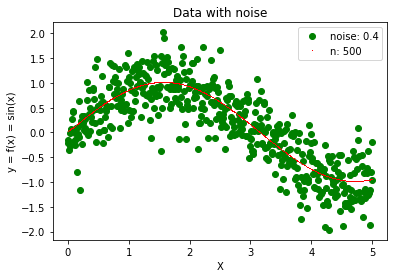

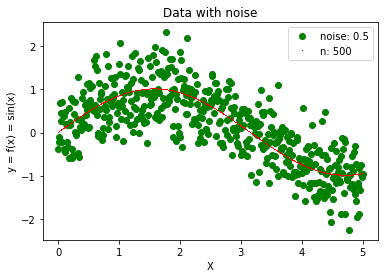

In [20]:
for n in (50, 100, 200, 500):
    X = np.linspace(0, 5, n)
    Y = np.sin(X)
    for noise in (.1, .2, .3, .4, .5):
        Y_sample = []
        for x in X:
            y = np.sin(x)
            y_sample = np.random.normal(loc=y, scale=noise)
            Y_sample.append(y_sample)
        plt.title('Data with noise')
        plt.plot(X, Y_sample, 'go', label='noise: ' + str(noise))
        plt.plot(X, Y, 'r,', label='n: ' + str(n))
        plt.xlabel('X')
        plt.ylabel('y = f(x) = sin(x)')
        plt.legend(loc='upper right')
        plt.show()